## Importing Necessary Libraries

In [1]:
# Necessary imports for project
# ML imports
import sklearn.linear_model
import sklearn.metrics
import sklearn.svm
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.neighbors
import sklearn.model_selection
# Data processing imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Statistical Analysis imports
import scipy
# Data visualization imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# General Python system imports
import os, sys

## Importing Data

In [2]:
# Rendering BRFSS data
brfss_path = "Downloads/LLCP2022.XPT" # Replace with local path to data
chunk = 445132 # Size of chunk to render
itr = pd.read_sas(brfss_path, chunksize=chunk)
df = itr.get_chunk()
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

# Preprocessing

In [3]:
# Defining scaler for normalizing continuous data
scaler = MinMaxScaler()

## Normalize Function For Scaling Data

In [4]:
def normalize(data, data_scaler):
    scaled = data.to_numpy().reshape(-1, 1)
    data_scaler.fit(scaled)
    scaled = data_scaler.transform(scaled)
    return pd.Series(scaled[:, 0])

(array([5.96300e+03, 4.25550e+04, 2.28807e+05, 1.57111e+05, 3.69000e+03,
        4.60000e+02, 6.73000e+02, 1.84000e+02, 1.47000e+02, 8.90000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

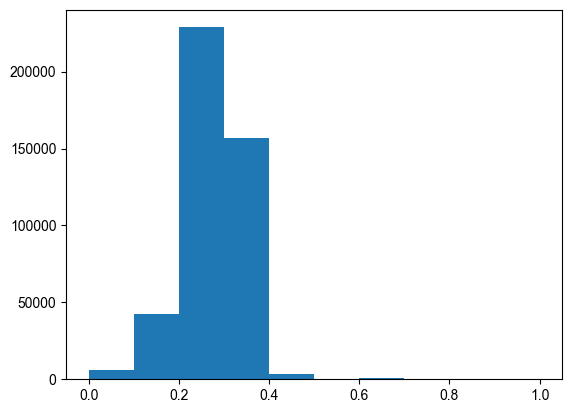

In [5]:
# Average Time Spent Sleeping
SLEPTIM1 = df.SLEPTIM1
SLEPTIM1 = SLEPTIM1.replace({77: np.nan, 99: np.nan})  # Replacing empty or missing values with nan
SLEPTIM1 = normalize(SLEPTIM1, scaler)
plt.hist(SLEPTIM1)

(array([2.88993e+05, 9.59300e+03, 2.26250e+04, 4.38020e+04, 5.53970e+04,
        1.55470e+04, 2.92500e+03, 3.03000e+02, 5.30000e+01, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

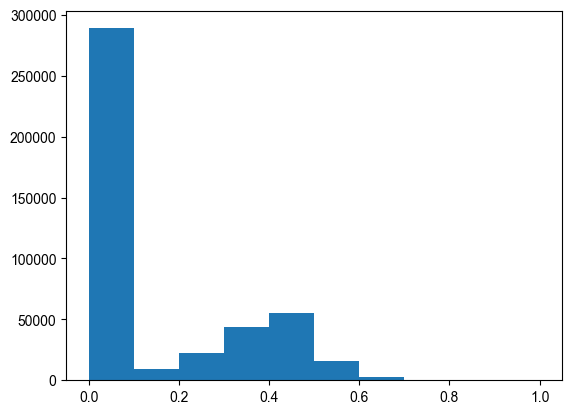

In [6]:
# Cigs smoked per day
LCSNUMCG = df.LCSNUMCG
# Replacing empty or missing values with nan, missing values (question not asked) for zero
LCSNUMCG = LCSNUMCG.replace({np.nan: 0, 777: np.nan, 999: np.nan})
LCSNUMCG = np.log(LCSNUMCG + 1) # Log Scaling for distribution, adding 1 to account for values of zero
LCSNUMCG = normalize(LCSNUMCG, scaler)
plt.hist(LCSNUMCG)

(array([2.35934e+05, 8.94250e+04, 6.37420e+04, 3.64240e+04, 1.19000e+04,
        4.16100e+03, 4.53000e+02, 3.86000e+02, 4.60000e+01, 5.80000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

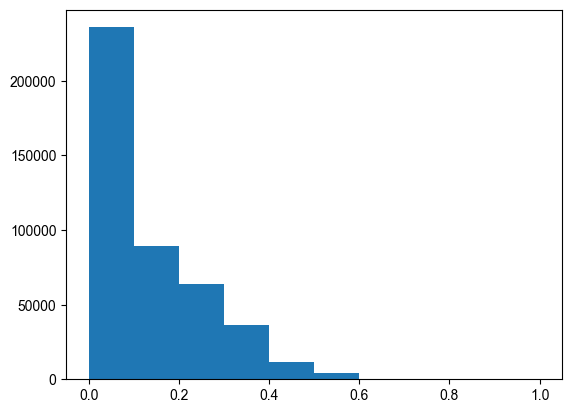

In [7]:
# Average Drinks Consumed When Drinking
AVEDRNK3 = df.AVEDRNK3
# Replacing empty or missing values with nan, missing values (question not asked) for zero
AVEDRNK3 = AVEDRNK3.replace({np.nan: 0, 88: 0, 77: np.nan, 99: np.nan}) 
AVEDRNK3 = np.log(AVEDRNK3 + 1) # Log Scaling for distribution, adding 1 to account for values of zero
AVEDRNK3 = normalize(AVEDRNK3, scaler)
plt.hist(AVEDRNK3)

(array([2.35725e+05, 5.28200e+04, 5.36930e+04, 5.09910e+04, 2.85090e+04,
        1.32000e+04, 1.98200e+03, 1.36700e+03, 1.28000e+02, 7.50000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

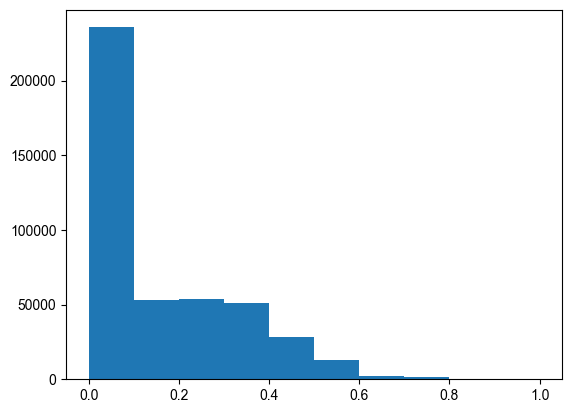

In [8]:
# Most Drinks Consumed at Once
MAXDRNKS = df.MAXDRNKS
# Replacing empty or missing values with nan, missing values (question not asked) for zero
MAXDRNKS = MAXDRNKS.replace({np.nan: 0, 88: 0, 77: np.nan, 99: np.nan})
MAXDRNKS = np.log(MAXDRNKS + 1) # Log Scaling for distribution, adding 1 to account for values of zero
MAXDRNKS = normalize(MAXDRNKS, scaler)
plt.hist(MAXDRNKS)

(array([3.8473e+05, 1.9447e+04, 1.1416e+04, 1.0581e+04, 6.3700e+03,
        3.9730e+03, 1.3390e+03, 3.7570e+03, 7.0000e+00, 2.6000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

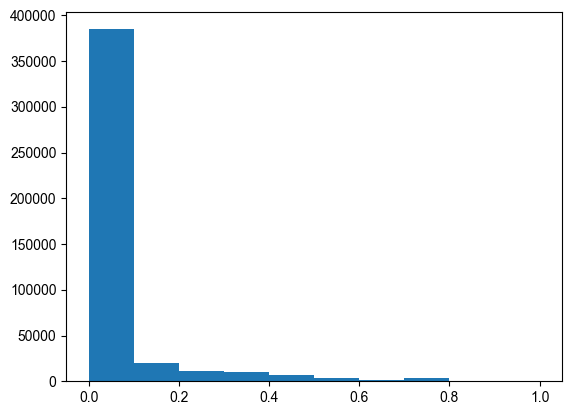

In [9]:
# Number of Times in Last 30 Days Where Men Had More Than 5 Drinks or Women More Than 4 
DRNK3GE5 = df.DRNK3GE5
# Replacing empty or missing values with nan, missing values (question not asked) for zero
DRNK3GE5 = DRNK3GE5.replace({np.nan: 0, 88: 0, 77: np.nan, 99: np.nan})
DRNK3GE5 = np.log(DRNK3GE5 + 1) # Log Scaling for distribution, adding 1 to account for values of zero
DRNK3GE5 = normalize(DRNK3GE5, scaler)
plt.hist(DRNK3GE5)

(array([6.20000e+01, 3.07000e+02, 6.27900e+03, 5.67370e+04, 1.39781e+05,
        1.45354e+05, 4.49420e+04, 8.68400e+03, 7.81000e+02, 1.27000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

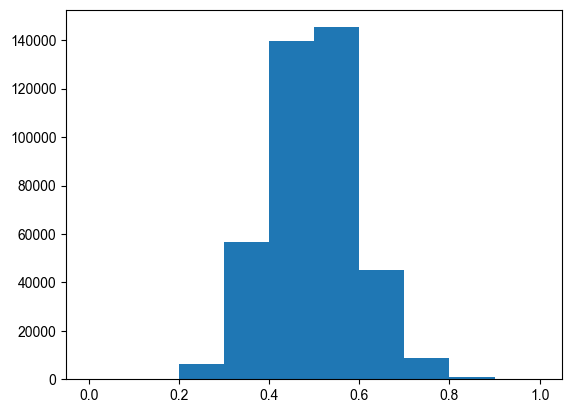

In [10]:
# Weight in kilograms
WTKG3 = df.WTKG3
WTKG3 = WTKG3/100 # Dividing by 100 to remove implied two decimal places in data
WTKG3 = np.log(WTKG3) # Log Scaling for distribution
WTKG3 = normalize(WTKG3, scaler)
plt.hist(WTKG3)

(array([2.90000e+01, 1.60000e+01, 9.20000e+01, 2.10000e+02, 2.71200e+03,
        1.21813e+05, 2.19475e+05, 6.74150e+04, 8.57000e+02, 3.70000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

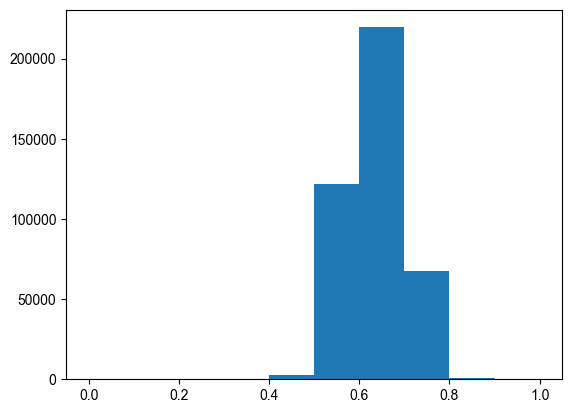

In [11]:
# Height in Inches
HTIN4 = df.HTIN4
HTIN4 = np.log(HTIN4) # Log Scaling for distribution
HTIN4 = normalize(HTIN4, scaler)
plt.hist(HTIN4)

(array([3.90000e+02, 5.84300e+03, 5.74430e+04, 1.49975e+05, 1.23452e+05,
        4.57160e+04, 1.12120e+04, 1.94400e+03, 2.76000e+02, 7.50000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

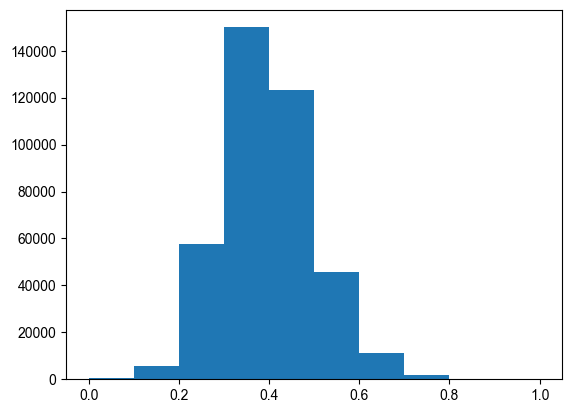

In [12]:
# Body Mass Index (BMI)
_BMI5 = df._BMI5
_BMI5 = _BMI5/100 # Dividing by 100 to remove implied two decimal places in data
_BMI5 = np.log(_BMI5) # Log Scaling for distribution
_BMI5 = normalize(_BMI5, scaler)
plt.hist(_BMI5)

(array([297528.,   2191.,   3522.,  11316.,  10814.,  21649.,  28013.,
         36706.,  31263.,   2130.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

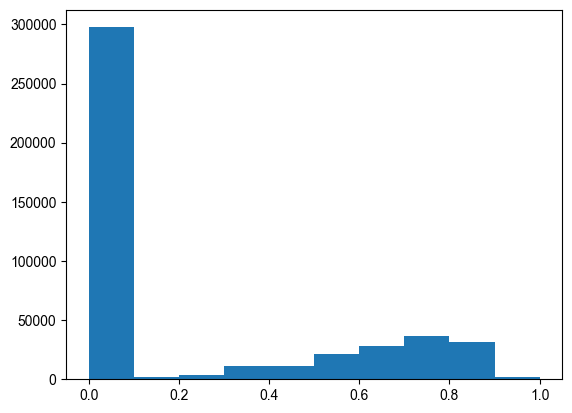

In [13]:
# Number of Years Smoked
_YRSSMOK = df._YRSSMOK
# Replacing empty or missing values with nan, missing values (question not asked) for zero
_YRSSMOK = _YRSSMOK.replace({np.nan: 0})
_YRSSMOK = np.log(_YRSSMOK + 1) # Log Scaling for distribution, adding 1 to account for values of zero
_YRSSMOK = normalize(_YRSSMOK, scaler)
plt.hist(_YRSSMOK)

In [14]:
# Target variable (Ever been diagnosed with myocardial infarction or CHD)
target = 2 - df._MICHD # Subtracting from 2 to make 1 indicate presence and 0 no presence
target.value_counts()

_MICHD
0.0    400360
1.0     39751
Name: count, dtype: int64

In [15]:
# Exercised at all in past 30 days
EXERANY2 = df.EXERANY2
EXERANY2 = EXERANY2.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
EXERANY2 = 2 - EXERANY2 # Subtracting from 2 to make 1 indicate yes and 0 no
EXERANY2.value_counts()

EXERANY2
1.0    337559
0.0    106480
Name: count, dtype: int64

In [16]:
# Variable for Sex
_SEX = df._SEX
_SEX = 2 - df._SEX # 0 = Female, 1 = Male

## Function For Binning Categorical Variables

In [17]:
# Function for binning categorical variables
# Takes in arr of values, bin values, boolean value of whether to make zero a bin, and the name of the variable
def bin(arr, bins, zero, name):
    new_arr = []
    for i in range(len(arr)):
        if (arr[i] == 0 and zero):
            new_arr.append(0)
        elif (np.isnan(arr[i])):
            new_arr.append(-100)
        else:
            for j in range(len(bins)):
                if (arr[i] < bins[j]):
                    new_arr.append(bins[j])
                    break
            else:
                new_arr.append(-1)
    ser = pd.Series(new_arr)
    maximum = bins[-1]
    fields = bins
    if (zero):
        fields.insert(0, 0)
    fields.append(-1)
    cols = {}
    for field in fields:
        if (field == 0): 
            cols[name + '=' + str(field)] = (ser == field).astype(int)
        elif (field == -1):
            cols[name + '>'+str(maximum)] = (ser == field).astype(int)
        else:
            cols[name + '<'+str(field)] = (ser == field).astype(int)
    pd_cols = pd.DataFrame.from_dict(cols)
    return pd_cols

In [18]:
# First Smoked
LCSFIRST = df.LCSFIRST
never_smoked_replacement = 0 # Replacement for people who have never smoked
# Replacing empty or missing values with nan, missing values (question not asked) for never_smoked_replacement
LCSFIRST = LCSFIRST.replace({777:np.nan, 888: 0, 999:np.nan, np.nan: never_smoked_replacement}) 
# Binning in never smoked, smoked before 18, and smoked after 18
LCSFIRST = bin(LCSFIRST, [18], True, "LCSFIRST")
LCSFIRST['LCSFIRST=0'].value_counts()

LCSFIRST=0
1    288275
0    156857
Name: count, dtype: int64

In [19]:
# Smoked 100 cigs in lifetime
SMOKE100 = df.SMOKE100
SMOKE100 = SMOKE100.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
SMOKE100 = 2 - SMOKE100 # Subtracting from 2 to make 1 indicate yes and 0 no
SMOKE100.value_counts()

SMOKE100
0.0    245955
1.0    164217
Name: count, dtype: int64

In [20]:
# Arthritis
HAVARTH4 = df.HAVARTH4
HAVARTH4 = HAVARTH4.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
HAVARTH4 = 2 - HAVARTH4 # Subtracting from 2 to make 1 indicate yes and 0 no
HAVARTH4.value_counts()

HAVARTH4
0.0    291351
1.0    151148
Name: count, dtype: int64

In [21]:
# Presence of COPD (Chronic Obstructive Pulmonary Disease)
CHCCOPD3 = df.CHCCOPD3
CHCCOPD3 = CHCCOPD3.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
CHCCOPD3 = 2 - CHCCOPD3 # Subtracting from 2 to make 1 indicate yes and 0 no
CHCCOPD3.value_counts()

CHCCOPD3
0.0    407257
1.0     35656
Name: count, dtype: int64

In [22]:
# Presence of Kidney Disease
CHCKDNY2 = df.CHCKDNY2
CHCKDNY2 = CHCKDNY2.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
CHCKDNY2 = 2 - CHCKDNY2 # Subtracting from 2 to make 1 indicate yes and 0 no
CHCKDNY2.value_counts()

CHCKDNY2
0.0    422891
1.0     20315
Name: count, dtype: int64

In [23]:
# Presence of Asthma
_LTASTH1 = df._LTASTH1
_LTASTH1 = _LTASTH1.replace({7: np.nan, 9: np.nan}) # Replacing empty or missing values with nan
_LTASTH1 = _LTASTH1 - 1 # Subtracting 1 to make 1 indicate yes and 0 no
_LTASTH1.value_counts()

_LTASTH1
0.0    376665
1.0     66694
Name: count, dtype: int64

In [24]:
# Presence of diabetes
DIABETE4 = df.DIABETE4
# Replacing empty or missing values with nan, making binary by converting all others to "no"
DIABETE4 = DIABETE4.replace({7: np.nan, 9: np.nan, 2: 0, 3:0, 4:0})
DIABETE4.value_counts()

DIABETE4
0.0    382887
1.0     61158
Name: count, dtype: int64

In [25]:
# Categorical Variable for Teeth Removed
# 1 = 1-5 Teeth Removed
# 2 = 6 or More Teeth Removed, But Not All
# 3 = All Teeth Removed
# 8 = No Teeth Removed
# All others = Missing Values
RMVTETH4 = df.RMVTETH4
RMVTETH4_cols = {}
# One Hot Encoding for Teeth Removed
for field in [1, 2, 3, 8]:
    RMVTETH4_cols['RMVTETH4=' + str(field)] = (RMVTETH4 == field).astype(int)
RMVTETH4_cols = pd.DataFrame.from_dict(RMVTETH4_cols)
RMVTETH4_cols

,RMVTETH4=1,RMVTETH4=2,RMVTETH4=3,RMVTETH4=8
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
445127,0,0,0,1
445128,0,0,0,1
445129,1,0,0,0
445130,0,0,0,1


In [26]:
# Categorical Variable for Race
# 1 = White Only
# 2 = Black Only
# 3 = American Indian or Alaskan Native only
# 4 = Asian Only
# 5 = Native Hawaiian or other Pacific Islander only
# 7 = Multiracial
# 8 = Hispanic
# All others = Missing Values
_RACE1 = df._RACE1
_RACE1_cols = {}
# One Hot Encoding for Race
for field in [1,2,3,4,5,7,8]:
    _RACE1_cols['_RACE1=' + str(field)] = (_RACE1 == field).astype(int)
_RACE1_cols = pd.DataFrame.from_dict(_RACE1_cols)
_RACE1_cols

,_RACE1=1,_RACE1=2,_RACE1=3,_RACE1=4,_RACE1=5,_RACE1=7,_RACE1=8
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
445127,0,1,0,0,0,0,0
445128,0,1,0,0,0,0,0
445129,0,0,0,0,0,0,0
445130,0,1,0,0,0,0,0


(array([48931., 25807., 28526., 29942., 28531., 70465., 44511., 47099.,
        43472., 68769.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

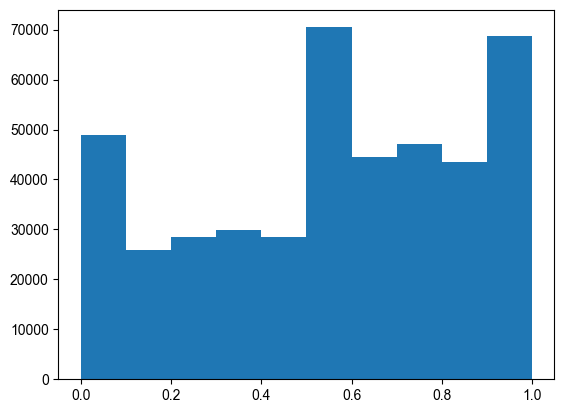

In [27]:
# Categorical Variable for Age Made Continuous
_AGEG5YR = df._AGEG5YR
_AGEG5YR = _AGEG5YR.replace({14:np.nan}) # Replacing empty or missing values with nan
_AGEG5YR = normalize(_AGEG5YR, scaler)
plt.hist(_AGEG5YR)

(array([1.87667e+05, 3.13550e+04, 4.93320e+04, 3.60550e+04, 4.00140e+04,
        2.61830e+04, 2.79480e+04, 1.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

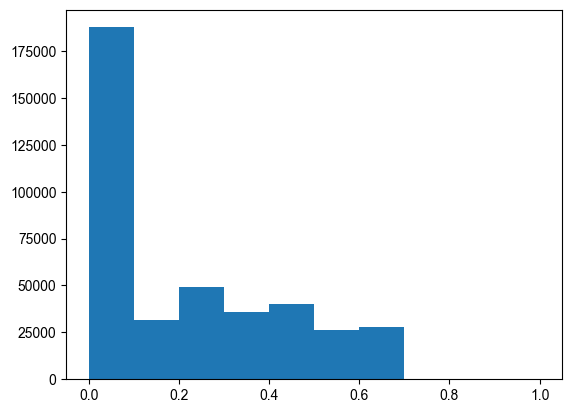

In [28]:
# Number of days drank in last 7 or last 30 days
ALCDAY4 = df.ALCDAY4
alc = []
for i in range(len(ALCDAY4)):
    if (ALCDAY4[i] < 100):
        alc.append(ALCDAY4[i])
    elif (ALCDAY4[i] < 200):
        alc.append((ALCDAY4[i]-100)*(30/7))
    elif (ALCDAY4[i] < 300):
        alc.append((ALCDAY4[i]-200))
    elif (ALCDAY4[i] == 888):
        alc.append(0)
    else:
        alc.append(ALCDAY4[i])
# New Series with number of days drank in last 30
ALCDAY4 = pd.Series(alc)
ALCDAY4 = ALCDAY4.replace({777: np.nan, 999:np.nan}) # Replacing empty or missing values with nan
ALCDAY4 = np.log(ALCDAY4+1) # Log Scaling for distribution, adding 1 to account for values of zero
ALCDAY4 = normalize(ALCDAY4, scaler)
plt.hist(ALCDAY4)

## Combining Features Into Final Dataframe

In [29]:
# Concatenating all variables into one large feature dataframe
df_features = pd.concat([LCSFIRST, _RACE1_cols, RMVTETH4_cols], join = "inner", axis = 1)
df_features = df_features.assign(EXERANY2 = EXERANY2) 
df_features = df_features.assign(SLEPTIM1 = SLEPTIM1) 
df_features = df_features.assign(HTIN4 = HTIN4, _BMI5 = _BMI5, WTKG3 = WTKG3) 
df_features = df_features.assign(SMOKE100 = SMOKE100) 
df_features = df_features.assign(_SEX = _SEX, _AGEG5YR = _AGEG5YR) 
df_features = df_features.assign(HAVARTH4 = HAVARTH4,CHCCOPD3 = CHCCOPD3,CHCKDNY2 = CHCKDNY2,_LTASTH1 = _LTASTH1,DIABETE4 = DIABETE4) 
df_features = df_features.assign(AVEDRNK3=AVEDRNK3, MAXDRNKS=MAXDRNKS,ALCDAY4=ALCDAY4, _YRSSMOK=_YRSSMOK,LCSNUMCG=LCSNUMCG)
df_features

,LCSFIRST=0,LCSFIRST<18,LCSFIRST>18,_RACE1=1,_RACE1=2,_RACE1=3,_RACE1=4,_RACE1=5,_RACE1=7,_RACE1=8,...,HAVARTH4,CHCCOPD3,CHCKDNY2,_LTASTH1,DIABETE4,AVEDRNK3,MAXDRNKS,ALCDAY4,_YRSSMOK,LCSNUMCG
0,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,1,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.881806,0.171696
4,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.252915,0.252915,0.258061,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,NaN,0.000000,0.000000
445128,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
445129,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,0.830249,0.475811
445130,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


## Dropping Missing Values

In [30]:
# Reindexing both arrays to drop all missing or empty values (represented by nan)
df_target = target
df_features = df_features.dropna(how='any')
df_target = df_target.reindex(df_features.index).dropna()
df_features = df_features.reindex(df_target.index)
df_features

,LCSFIRST=0,LCSFIRST<18,LCSFIRST>18,_RACE1=1,_RACE1=2,_RACE1=3,_RACE1=4,_RACE1=5,_RACE1=7,_RACE1=8,...,HAVARTH4,CHCCOPD3,CHCKDNY2,_LTASTH1,DIABETE4,AVEDRNK3,MAXDRNKS,ALCDAY4,_YRSSMOK,LCSNUMCG
1,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.252915,0.252915,0.258061,0.000000,0.000000
5,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.252915,0.252915,0.333539,0.820333,0.560048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445123,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
445124,1,0,0,0,0,0,0,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.252915,0.252915,0.420476,0.000000,0.000000
445126,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.370513,0.370513,0.204508,0.000000,0.000000
445128,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


# Model Training
## Creating Holdout Sets
## Testing Classification Models

In [31]:
import sklearn.model_selection, sklearn.ensemble, sklearn.tree

''' Setting up features, labels, and models '''
SEED = 1 # fixed randomization seed for reproducibility
X = df_features.values
y = df_target.values

# Types of models to test
clf_bases = [
    sklearn.ensemble.RandomForestClassifier(criterion = "gini", min_samples_leaf = 125, class_weight = 'balanced'),
    sklearn.naive_bayes.GaussianNB(),
    sklearn.svm.LinearSVC(class_weight = 'balanced', max_iter = 10000),
    sklearn.linear_model.LogisticRegression(class_weight = 'balanced', max_iter = 10000),
]

''' Isolating 10% of samples as holdout dataset '''
sss = sklearn.model_selection.StratifiedShuffleSplit(n_splits=1, random_state=SEED, test_size=0.1)
for crossval_indices, holdout_indices in sss.split(X,y):
    X_crossval = X[crossval_indices,:]
    y_crossval = y[crossval_indices]
    X_holdout = X[holdout_indices,:]
    y_holdout = y[holdout_indices]


# Training of global models
# n_splits = num cross validation folds
skf = sklearn.model_selection.StratifiedKFold(n_splits=5)



df_summary = []
for c,clf_base in enumerate(clf_bases):
    # Labels of model types
    label = ['Tree', 'NB','SVC','Log'][c]
    for i, (train_indices, test_indices) in enumerate(skf.split(X_crossval, y_crossval)):
        X_train = X_crossval[train_indices,:]
        y_train = y_crossval[train_indices]
        X_test = X_crossval[test_indices,:]
        y_test = y_crossval[test_indices]

        clf = clf_base # need to copy? clone?
        clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        acc_train = sklearn.metrics.accuracy_score(y_train, y_train_predict)
        mcc_train = sklearn.metrics.matthews_corrcoef(y_train, y_train_predict)
        acc_test = sklearn.metrics.accuracy_score(y_test, y_test_predict)
        mcc_test = sklearn.metrics.matthews_corrcoef(y_test, y_test_predict)

        print(label, 'Fold', i+1)
        print('ACC train:', acc_train)
        print('ACC test:', acc_test)
        print('MCC train:', mcc_train)
        print('MCC test:', mcc_test)
        results = (label, 'Train', i+1, acc_train, mcc_train)
        df_summary.append(results)
        results = (label, 'Test', i+1, acc_test, mcc_test)
        df_summary.append(results)
        
df_summary = pd.DataFrame(data=df_summary, columns=['model','Eval Set','fold','ACC','MCC'])
# Summary dataframe with all results
df_summary

Tree Fold 1
ACC train: 0.7030259977790841
ACC test: 0.6999477431576197
MCC train: 0.3125704139969604
MCC test: 0.29588148690261473
Tree Fold 2
ACC train: 0.7040221438369586
ACC test: 0.6961754523482918
MCC train: 0.3123457538642647
MCC test: 0.2995531745371927
Tree Fold 3
ACC train: 0.7041691162061532
ACC test: 0.6969593049839964
MCC train: 0.3131024376845249
MCC test: 0.2913592880735639
Tree Fold 4
ACC train: 0.7045324645633287
ACC test: 0.7035893918609968
MCC train: 0.31235746105238005
MCC test: 0.29944968469550115
Tree Fold 5
ACC train: 0.7057776471356718
ACC test: 0.7043569142334575
MCC train: 0.3119597931672158
MCC test: 0.30340012294436414
NB Fold 1
ACC train: 0.7918707949572147
ACC test: 0.7923933633810177
MCC train: 0.2630043226443496
MCC test: 0.2614675854915452
NB Fold 2
ACC train: 0.7918748775230257
ACC test: 0.789437585733882
MCC train: 0.26183857507043745
MCC test: 0.25823635410101975
NB Fold 3
ACC train: 0.7913074008753022
ACC test: 0.7897478607355151
MCC train: 0.2635236

/Users/aidenchavda/opt/miniconda3/envs/BRFSS/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Fold 1
ACC train: 0.7187887843752041
ACC test: 0.7199196551048402
MCC train: 0.30376067063857753
MCC test: 0.299472343953021


/Users/aidenchavda/opt/miniconda3/envs/BRFSS/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Fold 2
ACC train: 0.7194501600365798
ACC test: 0.7152002090273695
MCC train: 0.3032489787863884
MCC test: 0.30238659400524703


/Users/aidenchavda/opt/miniconda3/envs/BRFSS/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Fold 3
ACC train: 0.7201931870141747
ACC test: 0.7178947024626037
MCC train: 0.30426119221335934
MCC test: 0.2993668512559613


/Users/aidenchavda/opt/miniconda3/envs/BRFSS/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Fold 4
ACC train: 0.7178008034489516
ACC test: 0.7206871774773009
MCC train: 0.3026217064430955
MCC test: 0.3045179084896194


/Users/aidenchavda/opt/miniconda3/envs/BRFSS/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVC Fold 5
ACC train: 0.7184254360180287
ACC test: 0.7209321314259586
MCC train: 0.30201930096984153
MCC test: 0.3086718447839087
Log Fold 1
ACC train: 0.7248881376967796
ACC test: 0.7253902932915278
MCC train: 0.30531134468910487
MCC test: 0.3017502889216728
Log Fold 2
ACC train: 0.7249044679600235
ACC test: 0.721307727480567
MCC train: 0.30487321552195823
MCC test: 0.30481018279284877
Log Fold 3
ACC train: 0.72578221960938
ACC test: 0.7228101116990006
MCC train: 0.30602231536040925
MCC test: 0.29965327903146916
Log Fold 4
ACC train: 0.7235531386765954
ACC test: 0.7270069893526684
MCC train: 0.3041531085545342
MCC test: 0.30632915073959993
Log Fold 5
ACC train: 0.7243165784832452
ACC test: 0.7265987327715723
MCC train: 0.30348344247718373
MCC test: 0.3101593222401894


,model,Eval Set,fold,ACC,MCC
0,Tree,Train,1,0.703026,0.312570
1,Tree,Test,1,0.699948,0.295881
2,Tree,Train,2,0.704022,0.312346
3,Tree,Test,2,0.696175,0.299553
4,Tree,Train,3,0.704169,0.313102
5,Tree,Test,3,0.696959,0.291359
6,Tree,Train,4,0.704532,0.312357
7,Tree,Test,4,0.703589,0.299450
8,Tree,Train,5,0.705778,0.311960
9,Tree,Test,5,0.704357,0.303400


In [174]:
flag = False
total = 0
count = 0
for i in df_summary['ACC']:
    if (flag):
        total = total + i
        count = count + 1
    if (count == 5):
        count = 0
        print(total/5)
        total = 0
    flag = not(flag)

0.7002057613168725
0.791668299692991
0.7189267750996147
0.7246227709190672


## Evaluating Final Model

In [32]:
clf = sklearn.linear_model.LogisticRegression(class_weight = 'balanced', max_iter = 10000)

clf.fit(X_crossval,y_crossval) # Fit on all non-holdout data
y_crossval_predict = clf.predict(X_crossval)
y_holdout_predict = clf.predict(X_holdout) # Evaluate on holdout data

acc_cv = sklearn.metrics.accuracy_score(y_crossval, y_crossval_predict)
mcc_cv = sklearn.metrics.matthews_corrcoef(y_crossval, y_crossval_predict)
acc_ho = sklearn.metrics.accuracy_score(y_holdout, y_holdout_predict)
mcc_ho = sklearn.metrics.matthews_corrcoef(y_holdout, y_holdout_predict)

print('ACC crossval:', acc_cv)
print('ACC holdout:', acc_ho)
print('MCC crossval:', mcc_cv)
print('MCC holdout:', mcc_ho)

ACC crossval: 0.7247338167091254
ACC holdout: 0.7239858906525574
MCC crossval: 0.30485454949422336
MCC holdout: 0.3073672530440067


# Creating Demographic-Split Models

In [33]:
# Making dataframe that can be split based on race
df_features_by_race = df_features
df_features_by_race = df_features_by_race.drop(columns = ['_RACE1=1', '_RACE1=2', '_RACE1=3', '_RACE1=4', '_RACE1=5', '_RACE1=7', '_RACE1=8'])
df_features_by_race = df_features_by_race.assign(_RACE1 = _RACE1)
df_features_by_race._RACE1.value_counts()

_RACE1
1.0    254592
8.0     28746
2.0     25230
4.0      9577
7.0      7611
9.0      7369
3.0      5208
5.0      1867
Name: count, dtype: int64

In [34]:
# Creating dataframe and target variable split based on race and sex
fields = [1, 2, 3, 4, 5, 7, 8] # Possible RACE1 Values
df_features_races_and_sex = []
df_targets_races_and_sex = []
races = ['WHITE', 'BLACK', 'NATIVE', 'ASIAN', 'PACIFIC', 'MULTI', 'HISPANIC'] # Possible races
genders = ['MALE', 'FEMALE'] # Possible Genders
labels = []

for i, f in enumerate(fields):
    temp = df_features_by_race[df_features_by_race['_RACE1'] == f]
    temp = temp.drop(columns = ['_RACE1'])
    df_features_races_and_sex.append(temp)
    df_targets_races_and_sex.append(df_target.reindex(temp.index))
    labels.append(races[i])
    male = temp[temp['_SEX'] == 1]
    female = temp[temp['_SEX'] == 0]
    male = male.drop(columns = ['_SEX'])
    female = female.drop(columns = ['_SEX'])
    male_targ = df_target.reindex(male.index)
    female_targ = df_target.reindex(female.index)
    labels.append(races[i] + "_" + genders[0])
    labels.append(races[i] + "_" + genders[1])
    df_features_races_and_sex.append(male)
    df_features_races_and_sex.append(female)
    df_targets_races_and_sex.append(male_targ)
    df_targets_races_and_sex.append(female_targ)
df_features_races_and_sex.append(df_features_by_race)
df_targets_races_and_sex.append(df_target)
labels.append("ALL")
for i, f in enumerate([1, 0]):
    temp = df_features_by_race[df_features_by_race['_SEX'] == f]
    temp = temp.drop(columns = ['_SEX'])
    df_features_races_and_sex.append(temp)
    df_targets_races_and_sex.append(df_target.reindex(temp.index))
    labels.append(genders[i])

df_features_races_and_sex[0]

,LCSFIRST=0,LCSFIRST<18,LCSFIRST>18,RMVTETH4=1,RMVTETH4=2,RMVTETH4=3,RMVTETH4=8,EXERANY2,SLEPTIM1,HTIN4,...,HAVARTH4,CHCCOPD3,CHCKDNY2,_LTASTH1,DIABETE4,AVEDRNK3,MAXDRNKS,ALCDAY4,_YRSSMOK,LCSNUMCG
1,1,0,0,0,0,0,0,0.0,0.217391,0.576711,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0,0,0,0,0,0,1.0,0.173913,0.560222,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,0,0,0,0,0,0,1.0,0.347826,0.560222,...,0.0,0.0,0.0,0.0,0.0,0.252915,0.252915,0.258061,0.000000,0.000000
5,1,0,0,0,0,0,0,0.0,0.260870,0.699908,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,0,0,0,0,0,0,0.0,0.304348,0.592940,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445089,1,0,0,0,0,0,1,1.0,0.260870,0.685290,...,0.0,0.0,0.0,0.0,0.0,0.252915,0.370513,0.420476,0.000000,0.000000
445090,1,0,0,0,0,0,1,0.0,0.260870,0.608918,...,0.0,0.0,0.0,0.0,0.0,0.412486,0.412486,0.258061,0.000000,0.000000
445119,0,0,1,1,0,0,0,1.0,0.260870,0.491493,...,0.0,0.0,0.0,1.0,0.0,0.159571,0.252915,0.204508,0.748967,0.475811
445120,0,0,1,0,0,1,0,1.0,0.217391,0.742557,...,1.0,0.0,0.0,0.0,0.0,0.252915,0.412486,0.639242,0.693146,0.216656


## Training Demographically Split Models

In [35]:
# Training Demographically Split Models
skf = sklearn.model_selection.StratifiedKFold(n_splits=5) # Number of Folds

X = df_features.values
y = df_target.values
# Models to Test
clf_bases = [
    sklearn.linear_model.LogisticRegression(class_weight = 'balanced', max_iter = 10000)
]
coefs_list = []
df_race_and_sex_summary = []
for c,db in enumerate(df_features_races_and_sex):
    label = labels[c]
    X = db.values
    y = df_targets_races_and_sex[c].values
    for i, (train_indices, test_indices) in enumerate(skf.split(X, y)):
        X_train = X[train_indices,:]
        y_train = y[train_indices]
        X_test = X[test_indices,:]
        y_test = y[test_indices]

        clf = clf_bases[0] # need to copy? clone?
        clf.fit(X_train, y_train)
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)
        acc_train = sklearn.metrics.accuracy_score(y_train, y_train_predict)
        mcc_train = sklearn.metrics.matthews_corrcoef(y_train, y_train_predict)
        acc_test = sklearn.metrics.accuracy_score(y_test, y_test_predict)
        mcc_test = sklearn.metrics.matthews_corrcoef(y_test, y_test_predict)
        #print(label, 'Fold', i+1)
        #print('ACC train:', acc_train)
        #print('ACC test:', acc_test)
        #print('MCC train:', mcc_train)
        #print('MCC test:', mcc_test)
        results = (label, i+1, acc_train, mcc_train, acc_test, mcc_test)
        df_race_and_sex_summary.append(results)
        co = pd.Series(data=clf.coef_[0,:], index=db.columns)
        dictionary = {}
        if (not "_RACE1" in co.index.values):
            dictionary['_RACE1'] = 0
        if (not "_SEX" in co.index.values):
            dictionary['_SEX'] = 0
        co = pd.concat([co, pd.Series(dictionary)])
        co = co.sort_index()
        coefs_list.append(co)
    print(label, " Done")
    
df_race_and_sex_summary = pd.DataFrame(data=df_race_and_sex_summary, columns=['category','fold','train ACC','train MCC', 'test ACC','test MCC'])
pd.set_option('display.max_rows', None)
# Summary DataFrame
display(df_race_and_sex_summary)
pd.reset_option('all')

WHITE  Done
WHITE_MALE  Done
WHITE_FEMALE  Done
BLACK  Done
BLACK_MALE  Done
BLACK_FEMALE  Done
NATIVE  Done
NATIVE_MALE  Done
NATIVE_FEMALE  Done
ASIAN  Done
ASIAN_MALE  Done
ASIAN_FEMALE  Done
PACIFIC  Done
PACIFIC_MALE  Done
PACIFIC_FEMALE  Done
MULTI  Done
MULTI_MALE  Done
MULTI_FEMALE  Done
HISPANIC  Done
HISPANIC_MALE  Done
HISPANIC_FEMALE  Done


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/43862270.py:43: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  co = pd.concat([co, pd.Series(dictionary)])
/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/43862270.py:43: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  co = pd.concat([co, pd.Series(dictionary)])
/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/43862270.py:43: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude emp

ALL  Done
MALE  Done
FEMALE  Done


,category,fold,train ACC,train MCC,test ACC,test MCC
0,WHITE,1,0.720773,0.307862,0.712131,0.304324
1,WHITE,2,0.721706,0.308915,0.714998,0.301978
2,WHITE,3,0.720897,0.307369,0.721729,0.308164
3,WHITE,4,0.720406,0.307222,0.723300,0.310361
4,WHITE,5,0.718663,0.306159,0.728996,0.312922
5,WHITE_MALE,1,0.708331,0.325928,0.695501,0.314955
6,WHITE_MALE,2,0.709037,0.325475,0.702717,0.318139
7,WHITE_MALE,3,0.706581,0.322736,0.712662,0.329739
8,WHITE_MALE,4,0.706943,0.323046,0.715806,0.329355
9,WHITE_MALE,5,0.707457,0.323240,0.711009,0.325989


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/43862270.py:52: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/43862270.py:52: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [36]:
import sklearn.model_selection, sklearn.ensemble
skf = sklearn.model_selection.StratifiedKFold(n_splits=5)
coef_weights = []
X = df_features.values
y = df_target.values
clf = sklearn.linear_model.LogisticRegression(class_weight = 'balanced', max_iter = 10000)
for i, (train_indices, test_indices) in enumerate(skf.split(X, y)):
    X_train = X[train_indices,:]
    y_train = y[train_indices]
    X_test = X[test_indices,:]
    y_test = y[test_indices]

    clf.fit(X_train, y_train)
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    acc_train = sklearn.metrics.accuracy_score(y_train, y_train_predict)
    mcc_train = sklearn.metrics.matthews_corrcoef(y_train, y_train_predict)
    acc_test = sklearn.metrics.accuracy_score(y_test, y_test_predict)
    mcc_test = sklearn.metrics.matthews_corrcoef(y_test, y_test_predict)
    coef_weights.append(np.abs(clf.coef_[0,:]))
coef_weights = pd.DataFrame(data=coef_weights, index = ['Fold ' + str(i+1) for i in range(5)])
coef_weights = coef_weights.transpose()
coef_weights = coef_weights.assign(index=df_features.columns)
coef_weights = coef_weights.sort_values(by = "Fold 1")
new_coef_weights = []
for i in coef_weights.index:
    for num,j in enumerate(coef_weights.columns[:5]):
        new_coef_weights.append([coef_weights['index'][i], coef_weights[j][i], num + 1])
new_coef_weights = pd.DataFrame(data=new_coef_weights, columns = ['Variable', 'Weight', 'Fold'])
new_coef_weights = new_coef_weights[new_coef_weights.index.values >= 110]
new_coef_weights

,Variable,Weight,Fold
110,LCSNUMCG,0.556940,1
111,LCSNUMCG,0.506835,2
112,LCSNUMCG,0.488765,3
113,LCSNUMCG,0.566581,4
114,LCSNUMCG,0.555078,5
115,_BMI5,0.561311,1
116,_BMI5,0.558901,2
117,_BMI5,0.548339,3
118,_BMI5,0.525326,4
119,_BMI5,0.402950,5


In [37]:
races = ['WHITE', 'BLACK', 'NATIVE', 'ASIAN', 'PACIFIC', 'MULTI', 'HISPANIC', 'ALL']
sexes = ['All', 'Male', 'Female']
#display(coefs_list)
coef_summary_all_samples = []
for i, r in enumerate(races):
    for j, s in enumerate(sexes):
        for k in range(5):
            to_append = [r, s, k+1]
            print(len(coefs_list[i*15+j*5+k]))
            for l in coefs_list[i*15+j*5+k]:
                to_append.append(l)
            coef_summary_all_samples.append(to_append)
columns = ['Race', 'Sex', 'Fold']
for i in coefs_list[0].index.values:
    columns.append(i)
coef_summary_all_samples = pd.DataFrame(data = coef_summary_all_samples, columns = columns)
coef_summary_all_samples

26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26


,Race,Sex,Fold,ALCDAY4,AVEDRNK3,CHCCOPD3,CHCKDNY2,DIABETE4,EXERANY2,HAVARTH4,...,RMVTETH4=8,SLEPTIM1,SMOKE100,WTKG3,_AGEG5YR,_BMI5,_LTASTH1,_RACE1,_SEX,_YRSSMOK
0,WHITE,All,1,-0.263759,-0.193051,0.609755,0.750690,0.667262,-0.204958,0.399835,...,-0.302822,-1.074324,-0.055952,0.196929,3.391523,0.652678,0.226944,0.000000,0.949938,0.655874
1,WHITE,All,2,-0.279396,0.105784,0.668686,0.760608,0.664793,-0.232571,0.406829,...,-0.347985,-1.058351,-0.020893,0.358618,3.427020,0.660477,0.190671,0.000000,0.900589,0.519857
2,WHITE,All,3,-0.330962,-0.170437,0.672386,0.770951,0.665746,-0.219718,0.381984,...,-0.366645,-1.034588,-0.039655,0.317769,3.365747,0.609124,0.209569,0.000000,0.915627,0.475781
3,WHITE,All,4,-0.333825,-0.093448,0.668937,0.764902,0.671813,-0.237361,0.375389,...,-0.354932,-0.916112,-0.049033,0.264871,3.433680,0.685126,0.202601,0.000000,0.929135,0.567743
4,WHITE,All,5,-0.327153,-0.183852,0.662403,0.756436,0.660869,-0.210010,0.404068,...,-0.373421,-1.096108,0.012132,0.218926,3.366888,0.585111,0.218042,0.000000,0.912742,0.521485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,ALL,Female,1,-0.483293,-0.004662,0.712224,0.825391,0.676410,-0.279602,0.470537,...,-0.355723,-1.226970,0.115887,-0.108258,2.808348,0.419738,0.327435,0.026406,0.000000,0.513333
116,ALL,Female,2,-0.437776,0.335173,0.776126,0.838740,0.643860,-0.300805,0.495789,...,-0.415553,-1.180855,0.123448,0.127324,2.727867,0.406021,0.266483,0.011076,0.000000,0.530107
117,ALL,Female,3,-0.549338,0.176157,0.768607,0.873298,0.635984,-0.325311,0.466758,...,-0.429643,-1.128190,0.108592,0.041959,2.765679,0.409578,0.300230,0.019699,0.000000,0.401822
118,ALL,Female,4,-0.510321,0.296218,0.783810,0.875784,0.645955,-0.335362,0.482831,...,-0.391804,-0.956238,0.158407,0.133645,2.754165,0.310611,0.275017,0.021901,0.000000,0.439068


# Evaluating Model Results and Creating Figures

In [38]:
# Creating df of variable weights vs. demographic

new_coefs_list = []
temp_list = coefs_list
for i in range(int(len(coefs_list)/5)):
    s = temp_list[i*5]
    for j in range(1, 5):
        s += temp_list[i*5 + j]
    s = s/5
    new_coefs_list.append(s)
new_coefs_list

coef_summary = pd.DataFrame(index = df_features_by_race.columns)
coef_summary = coef_summary.assign(WHITE = new_coefs_list[0], WHITE_MALE = new_coefs_list[1], WHITE_FEMALE = new_coefs_list[2])
coef_summary = coef_summary.assign(BLACK = new_coefs_list[3], BLACK_MALE = new_coefs_list[4], BLACK_FEMALE = new_coefs_list[5])
coef_summary = coef_summary.assign(NATIVE = new_coefs_list[6], NATIVE_MALE = new_coefs_list[7], NATIVE_FEMALE = new_coefs_list[8])
coef_summary = coef_summary.assign(PACIFIC = new_coefs_list[9], PACIFIC_MALE = new_coefs_list[10], PACIFIC_FEMALE = new_coefs_list[11])
coef_summary = coef_summary.assign(ASIAN = new_coefs_list[12], ASIAN_MALE = new_coefs_list[13], ASIAN_FEMALE = new_coefs_list[14])
coef_summary = coef_summary.assign(MULTI = new_coefs_list[15], MULTI_MALE = new_coefs_list[16], MULTI_FEMALE = new_coefs_list[17])
coef_summary = coef_summary.assign(HISPANIC = new_coefs_list[18], HISPANIC_MALE = new_coefs_list[19], HISPANIC_FEMALE = new_coefs_list[20])
coef_summary = coef_summary.assign(ALL = new_coefs_list[21], MALE = new_coefs_list[22], FEMALE = new_coefs_list[23])
pd.set_option('display.max_columns', None)
display(coef_summary.fillna(0))
pd.reset_option('all')

,WHITE,WHITE_MALE,WHITE_FEMALE,BLACK,BLACK_MALE,BLACK_FEMALE,NATIVE,NATIVE_MALE,NATIVE_FEMALE,PACIFIC,PACIFIC_MALE,PACIFIC_FEMALE,ASIAN,ASIAN_MALE,ASIAN_FEMALE,MULTI,MULTI_MALE,MULTI_FEMALE,HISPANIC,HISPANIC_MALE,HISPANIC_FEMALE,ALL,MALE,FEMALE
LCSFIRST=0,-0.352313,-0.425565,0.012875,0.569142,-0.260250,1.366304,0.131076,0.667397,-0.799487,0.306380,0.271994,-0.402350,0.471748,0.344513,0.071436,0.446001,0.699636,0.114655,0.446513,0.030672,1.678009,-0.004204,-0.258428,0.302617
LCSFIRST<18,-0.452727,-0.580667,-0.113211,0.186224,-0.215149,0.851589,-0.122346,0.298702,-0.393209,-0.221341,-0.730783,1.180555,0.211352,-0.051227,0.230555,-0.036446,-0.004151,-0.182263,0.232550,-0.157956,1.371099,-0.208854,-0.483525,0.118371
LCSFIRST>18,-0.565657,-0.651958,-0.264617,0.015505,-0.408952,0.686199,-0.203242,0.182053,-0.437491,-0.237723,-0.495349,0.690211,0.483544,0.179208,0.554268,-0.175076,-0.396381,0.029828,0.059890,-0.210814,1.043079,-0.322048,-0.573111,-0.013553
RMVTETH4=1,-0.111554,-0.053608,-0.167769,0.095023,0.054583,0.101584,-0.104227,0.259237,-0.372095,0.474422,0.425672,0.439905,-0.192380,0.380713,-0.569815,-0.253807,0.047587,-0.418766,-0.083695,-0.246049,0.044336,-0.069641,0.005393,-0.133676
RMVTETH4=2,0.132174,0.112780,0.151142,0.280259,0.220198,0.318174,0.106906,0.499406,-0.167768,0.328755,0.269714,0.348310,-0.112838,0.666805,-0.647432,-0.095008,0.045759,-0.110577,0.112824,-0.162199,0.320258,0.143836,0.140753,0.153819
RMVTETH4=3,0.249934,0.239417,0.254571,0.265444,0.228437,0.269695,0.174760,0.284437,0.140920,0.380114,0.752280,0.135211,0.171191,1.014268,-0.680301,-0.060790,0.174099,-0.153830,-0.030418,-0.121575,0.052879,0.237250,0.251500,0.234685
RMVTETH4=8,-0.349161,-0.284356,-0.406489,-0.121768,-0.167077,-0.112407,-0.338685,0.140846,-0.803600,-0.116744,-0.090021,-0.135037,-0.281752,0.054330,-0.467627,-0.652781,-0.289200,-0.870994,-0.301998,-0.349381,-0.290338,-0.311086,-0.220254,-0.385920
EXERANY2,-0.220924,-0.126077,-0.320850,-0.219367,-0.230881,-0.217929,-0.182360,-0.176194,-0.167222,-0.037075,0.277705,-0.290634,-0.093455,0.210303,-0.396337,-0.289334,-0.203862,-0.392223,-0.310289,-0.297060,-0.300063,-0.228531,-0.148915,-0.308403
SLEPTIM1,-1.035897,-0.851753,-1.119063,-0.503605,-0.178581,-0.796854,-1.485984,-1.479382,-1.132253,-1.738695,-1.511414,-1.383160,-0.724692,-0.717930,-0.322275,-0.327631,-0.203920,-0.391806,-1.492609,-1.178252,-1.712381,-1.038882,-0.887881,-1.148062
HTIN4,-1.215774,-1.170504,-1.226915,-0.231121,0.135972,-0.524055,0.109948,-0.355483,0.539352,-0.290613,-0.848068,0.575984,-1.151619,-1.207787,0.052223,-0.316456,0.354254,-0.882572,-0.323948,-0.675916,-0.004821,-0.912971,-0.878088,-1.034168


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/3682508190.py:24: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/3682508190.py:24: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [39]:
def analyze_performance(df, cols):
    folds = len(df.index)//len(df[df.columns[0]].value_counts())
    results = []
    for i in range(len(df[df.columns[0]].value_counts())):
        totals = [[0 for l in range(folds)] for l in range(len(cols))]
        for j in range(folds):
            for k in range(len(cols)):
                totals[k][j] = df[cols[k]][i*folds + j]
        stats = [df[df.columns[0]][i*folds]]
        for j in range(len(cols)):
            stats.append(np.mean(totals[j]))
            stats.append(np.std(totals[j]))
        results.append(stats)
    columns = ['Label']
    for i in range(len(cols)):
        columns.append(cols[i] + " Mean")
        columns.append(cols[i] + " STD")
    results = pd.DataFrame(data = results, columns = columns)
    return results

In [40]:
df_race_and_sex_summary_analyzed = analyze_performance(df_race_and_sex_summary, ['test ACC', 'test MCC'])
new_race_and_sex_summary = []
sex_labels = ['All', 'Male', 'Female']
for i in range(8):
    for j in range(3):
        new_race_and_sex_summary.append([df_race_and_sex_summary_analyzed['Label'][i*3], sex_labels[j], df_race_and_sex_summary_analyzed['test MCC Mean'][i*3 + j], len(df_features_races_and_sex[i*3 + j].index)])
new_race_and_sex_summary = pd.DataFrame(data = new_race_and_sex_summary, columns = ['Race', 'Sex', 'Mean MCC', 'Count'])
new_race_and_sex_summary

,Race,Sex,Mean MCC,Count
0,WHITE,All,0.307550,254592
1,WHITE,Male,0.323635,124037
2,WHITE,Female,0.265612,130555
3,BLACK,All,0.263060,25230
4,BLACK,Male,0.273047,10527
5,BLACK,Female,0.255179,14703
6,NATIVE,All,0.336288,5208
7,NATIVE,Male,0.364498,2541
8,NATIVE,Female,0.296143,2667
9,ASIAN,All,0.237891,9577


In [41]:
white_vs_nonwhite_and_sex_summary = []
white_vs_nonwhite_and_sex_summary.append(['White',new_race_and_sex_summary['Sex'][1],new_race_and_sex_summary['Count'][1]])
white_vs_nonwhite_and_sex_summary.append(['White',new_race_and_sex_summary['Sex'][2],new_race_and_sex_summary['Count'][2]])
male_count = 0
female_count = 0
for i in range(6):
    male_count += new_race_and_sex_summary['Count'][4 + i*3]
    female_count += new_race_and_sex_summary['Count'][5 + i*3]
white_vs_nonwhite_and_sex_summary.append(['Nonwhite', 'Male', male_count])
white_vs_nonwhite_and_sex_summary.append(['Nonwhite', 'Female', female_count])
white_vs_nonwhite_and_sex_summary = pd.DataFrame(data = white_vs_nonwhite_and_sex_summary, columns = ['Race', 'Sex', 'Count'])
white_vs_nonwhite_and_sex_summary

,Race,Sex,Count
0,White,Male,124037
1,White,Female,130555
2,Nonwhite,Male,36708
3,Nonwhite,Female,41531


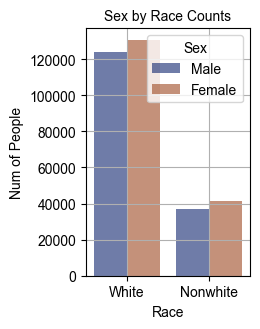

In [42]:
fig, ax = plt.subplots(1,1,figsize=(2.7,3.4))
sns.barplot(
    data=white_vs_nonwhite_and_sex_summary,
    x="Race", y="Count", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax)
ax.set_ylabel("Num of People")
ax.set_xlabel("Race")
ax.grid()
ax.set_title('Sex by Race Counts', size=10)
plt.tight_layout()
#ax.set_xticklabels(races[1:7], rotation=45, ha='right')
plt.savefig("Desktop/BRFSS/Fig_1A.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/2077837047.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Black', 'Native', 'Asian', 'Pacific', 'Multi', 'Hispanic'], rotation=45, ha='right')


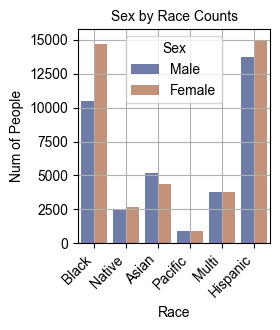

In [43]:
fig, ax = plt.subplots(1,1,figsize=(2.9,3.4))
dropped_all = new_race_and_sex_summary[new_race_and_sex_summary['Sex'] != "All"]
dropped_all = dropped_all[dropped_all['Race'] != "ALL"]
dropped_all = dropped_all[dropped_all['Race'] != "WHITE"]
sns.barplot(
    data=dropped_all,
    x="Race", y="Count", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax)
ax.set_ylabel("Num of People")
ax.set_xlabel("Race")
ax.grid()
ax.set_title('Sex by Race Counts', size=10)
ax.set_xticklabels(['Black', 'Native', 'Asian', 'Pacific', 'Multi', 'Hispanic'], rotation=45, ha='right')
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_1B.svg")

In [44]:
fields = range(1, 14)
df_features_ages_and_sex = []
df_targets_ages_and_sex = []
ages = [str(i) for i in fields]
genders = ['MALE', 'FEMALE']
labels = []

df_features_by_age = df_features_by_race.drop(columns = ['_AGEG5YR'])
df_features_by_age = df_features_by_age.assign(_AGEG5YR = df._AGEG5YR.reindex(df_features_by_age.index))

for i, f in enumerate(fields):
    temp = df_features_by_age[df_features_by_age['_AGEG5YR'] == f]
    temp = temp.drop(columns = ['_AGEG5YR'])
    male = temp[temp['_SEX'] == 1]
    female = temp[temp['_SEX'] == 0]
    male = male.drop(columns = ['_SEX'])
    female = female.drop(columns = ['_SEX'])
    male_targ = df_target.reindex(male.index)
    female_targ = df_target.reindex(female.index)
    labels.append(ages[i] + "_" + genders[0])
    labels.append(ages[i] + "_" + genders[1])
    df_features_ages_and_sex.append(male)
    df_features_ages_and_sex.append(female)
    df_targets_ages_and_sex.append(male_targ)
    df_targets_ages_and_sex.append(female_targ)
new_age_and_sex_summary = []
sex_labels = ['Male', 'Female']
age_groups = ['18-24', '25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59', '60-64','65-69', '70-74','75-79', '80+']
for i in range(13):
    for j in range(2):
        new_age_and_sex_summary.append([age_groups[i], sex_labels[j], len(df_features_ages_and_sex[i*2 + j].index)])
new_age_and_sex_summary = pd.DataFrame(data = new_age_and_sex_summary, columns = ['Age', 'Sex', 'Count'])
new_age_and_sex_summary
total_count = 0
for i in range(12, 26):
    total_count += new_age_and_sex_summary['Count'][i]
new_age_and_sex_summary

,Age,Sex,Count
0,18-24,Male,11972
1,18-24,Female,8846
2,25-29,Male,9206
3,25-29,Female,7588
4,30-34,Male,10122
5,30-34,Female,9337
6,35-39,Male,10970
7,35-39,Female,10820
8,40-44,Male,11250
9,40-44,Female,11839


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/274482875.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_groups, rotation=45, ha='right')


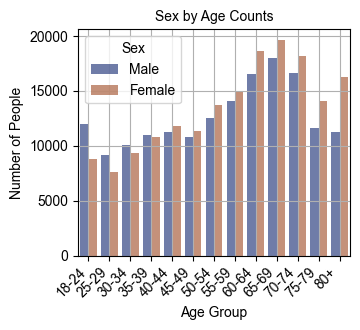

In [45]:
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
sns.barplot(
    data=new_age_and_sex_summary,
    x="Age", y="Count", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax=ax)
ax.set_ylabel("Number of People")
ax.set_xlabel("Age Group")
ax.set_title('Sex by Age Counts', size=10)
ax.set_xticklabels(age_groups, rotation=45, ha='right')
ax.grid()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_1C.svg")

In [46]:
age_fields = range(1, 14)
races = ['WHITE', 'BLACK', 'NATIVE', 'ASIAN', 'PACIFIC', 'MULTI', 'HISPANIC']
race_fields = [1, 2, 3, 4, 5, 7, 8]
df_age_and_race_summary = [[0 for i in range(len(race_fields))] for i in range(len(age_fields))]
for i, a in enumerate(age_fields):
    split_by_age = df_features_by_age[df_features_by_age['_AGEG5YR'] == a]
    for j, r in enumerate(race_fields):
        split_by_age_and_race = split_by_age[split_by_age['_RACE1'] == r]
        df_age_and_race_summary[i][j] = len(split_by_age_and_race.index)
df_age_and_race_summary = pd.DataFrame(data = df_age_and_race_summary, columns = races, index = age_groups)
df_age_and_race_summary

,WHITE,BLACK,NATIVE,ASIAN,PACIFIC,MULTI,HISPANIC
18-24,12339,1742,392,1393,193,931,3534
25-29,10452,1303,277,1003,143,681,2631
30-34,12550,1629,358,986,145,628,2775
35-39,14551,1797,384,931,159,744,2726
40-44,15736,1924,428,852,149,666,2798
45-49,15313,1994,403,770,151,544,2491
50-54,19021,2270,499,695,171,571,2464
55-59,21904,2358,536,571,178,589,2268
60-64,27657,2606,599,606,177,644,2126
65-69,30582,2616,501,568,147,578,1819


In [47]:
white_vs_nonwhite_and_age_summary = []
race_labels = ['White', 'Nonwhite']
age_groups = ['18-24', '25-29', '30-34','35-39', '40-44','45-49', '50-54', '55-59', '60-64','65-69', '70-74','75-79', '80+']
for i in range(13):
    for j in range(2):
        if (j == 0):
            count = df_age_and_race_summary["WHITE"][age_groups[i]]
            white_vs_nonwhite_and_age_summary.append([age_groups[i], race_labels[j], count])
        else:
            count = 0
            for k in range(1, len(races)):
                count += df_age_and_race_summary[races[k]][age_groups[i]]
            white_vs_nonwhite_and_age_summary.append([age_groups[i], race_labels[j], count])
white_vs_nonwhite_and_age_summary = pd.DataFrame(data = white_vs_nonwhite_and_age_summary, columns = ['Age', 'Race', 'Count'])
white_vs_nonwhite_and_age_summary

,Age,Race,Count
0,18-24,White,12339
1,18-24,Nonwhite,8185
2,25-29,White,10452
3,25-29,Nonwhite,6038
4,30-34,White,12550
5,30-34,Nonwhite,6521
6,35-39,White,14551
7,35-39,Nonwhite,6741
8,40-44,White,15736
9,40-44,Nonwhite,6817


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/1451432054.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_groups, rotation=45, ha='right')


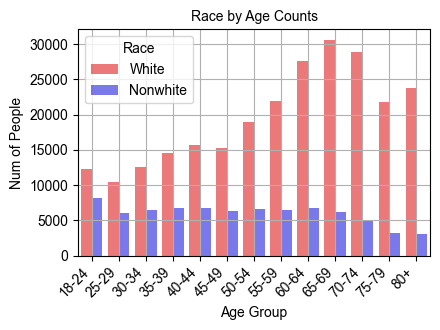

In [48]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 3.4))
sns.barplot(
    data=white_vs_nonwhite_and_age_summary,
    x="Age", y="Count", hue="Race",
    errorbar="sd", palette="blend:red,blue", alpha=.6, ax=ax)
ax.set_xlabel("Age Group")
ax.set_ylabel("Num of People")
ax.set_xticklabels(age_groups, rotation=45, ha='right')
ax.set_title("Race by Age Counts", size = 10)
ax.grid()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_1D.svg")

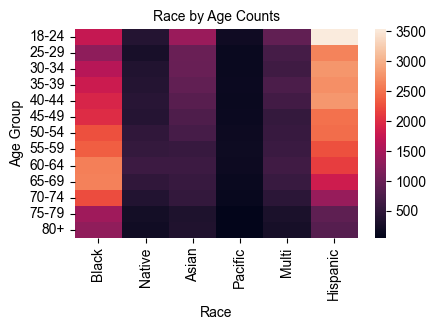

In [49]:
fig, ax = plt.subplots(1,1,figsize=(4.5, 3.4))
sns.heatmap(df_age_and_race_summary.drop(columns = ['WHITE']), ax = ax, fmt='.0f')
ax.set_xlabel("Race")
ax.set_ylabel("Age Group")
ax.set_xticklabels(['Black', 'Native', 'Asian', 'Pacific', 'Multi', 'Hispanic'])
ax.set_title("Race by Age Counts", size = 10)
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_1E.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/404647901.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Random\nForest", "Naive\nBayes", "SVM", "Logistic\nRegression"])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

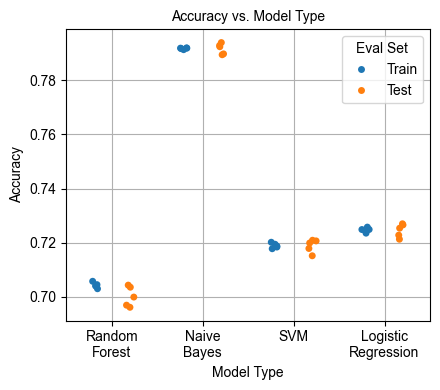

In [172]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4))
sns.stripplot(data=df_summary, x='model', y='ACC', hue='Eval Set', dodge=True, ax = ax)
ax.grid()
ax.set_ylabel("Accuracy")
ax.set_xlabel("Model Type")
ax.set_xticklabels(["Random\nForest", "Naive\nBayes", "SVM", "Logistic\nRegression"])
ax.set_title("Accuracy vs. Model Type", size = 10)
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3A.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/705629333.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Random\nForest", "Naive\nBayes", "SVM", "Logistic\nRegression"])


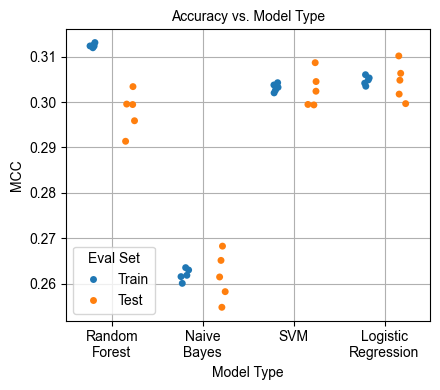

In [166]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4))
sns.stripplot(data=df_summary, x='model', y='MCC', hue='Eval Set', dodge=True, ax = ax)
ax.set_ylabel("MCC")
ax.set_xlabel("Model Type")
ax.set_xticklabels(["Random\nForest", "Naive\nBayes", "SVM", "Logistic\nRegression"])
ax.set_title("Accuracy vs. Model Type", size = 10)
ax.grid()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3B.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/2113640293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/2113640293.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Cigs/Day', 'BMI','Years Smoked', 'Diabetes', 'COPD', 'Kidney Disease', 'Male', 'Height', 'Sleep Time', 'Age'], rotation=45, ha='right')


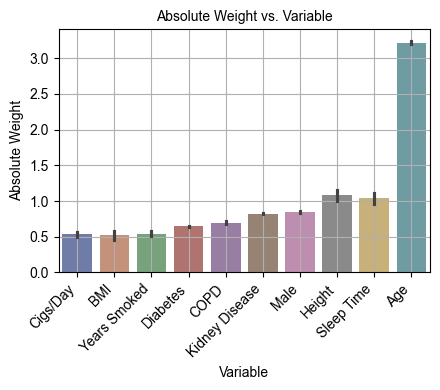

In [170]:
fig, ax = plt.subplots(1,1,figsize=(4.5,4))
modified_new_coef_weights = new_coef_weights[new_coef_weights['Variable'] != "_RACE1=5"]
sns.barplot(
    data=modified_new_coef_weights, x = "Variable", y = "Weight",
    errorbar="sd", palette="dark", alpha=.6, ax=ax)
ax.set_xticklabels(['Cigs/Day', 'BMI','Years Smoked', 'Diabetes', 'COPD', 'Kidney Disease', 'Male', 'Height', 'Sleep Time', 'Age'], rotation=45, ha='right')
ax.set_ylabel('Absolute Weight')
ax.set_title("Absolute Weight vs. Variable", size = 10)
ax.grid()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3C.svg")

In [53]:
age_scaler = MinMaxScaler()
age_scaler.fit(df._AGEG5YR.replace({14:np.nan}).to_numpy().reshape(-1, 1))
no_michd = df_target[df_target == 0].index
yes_michd = df_target[df_target == 1].index
no_michd_age = df_features._AGEG5YR.reindex(no_michd)
scaled = no_michd_age.to_numpy().reshape(-1, 1)
scaled = age_scaler.inverse_transform(scaled)
no_michd_age = pd.Series(scaled[:, 0])
yes_michd_age = df_features._AGEG5YR.reindex(yes_michd)
scaled = yes_michd_age.to_numpy().reshape(-1, 1)
scaled = age_scaler.inverse_transform(scaled)
yes_michd_age = pd.Series(scaled[:, 0])

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/3607090973.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0','40', '65'])


MannwhitneyuResult(statistic=2452700706.0, pvalue=0.0)


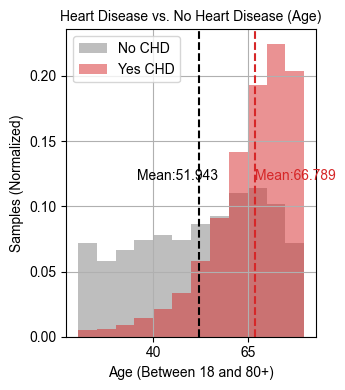

In [158]:
fig, ax = plt.subplots(1,1,figsize=(3.5,4))
ax.hist(no_michd_age, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(0.99,13.99,1))
ax.hist(yes_michd_age, density=True, color='tab:red', alpha=0.5, label='Yes CHD',bins = np.arange(0.99,13.99,1))
ax.axvline(np.mean(no_michd_age), color='black', ls='--')
ax.axvline(np.mean(yes_michd_age), color='tab:red', ls='--')
no_chd_mean = (np.mean(no_michd_age)-7)*5+50
yes_chd_mean = (np.mean(yes_michd_age)-10)*5+65
ax.text(np.mean(no_michd_age)-3.25, 0.12, 'Mean:' + str(round(np.mean(no_chd_mean),3)))
ax.text(np.mean(yes_michd_age), 0.12, 'Mean:' + str(round(np.mean(yes_chd_mean),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Age (Between 18 and 80+)')
ax.set_ylabel('Samples (Normalized)')
ax.set_title('Heart Disease vs. No Heart Disease (Age)', size=10)
ax.set_xticklabels(['0','40', '65'])
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_age, yes_michd_age))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3D.svg")

In [65]:
sleep_scaler = MinMaxScaler()
sleep_scaler.fit(df.SLEPTIM1.replace({77: np.nan, 99: np.nan}).to_numpy().reshape(-1, 1))
no_michd = df_target[df_target == 0].index
yes_michd = df_target[df_target == 1].index
no_michd_sleep = df_features.SLEPTIM1.reindex(no_michd)
scaled = no_michd_sleep.to_numpy().reshape(-1, 1)
scaled = sleep_scaler.inverse_transform(scaled)
no_michd_sleep = pd.Series(scaled[:, 0])
yes_michd_sleep = df_features.SLEPTIM1.reindex(yes_michd)
scaled = yes_michd_sleep.to_numpy().reshape(-1, 1)
scaled = sleep_scaler.inverse_transform(scaled)
yes_michd_sleep = pd.Series(scaled[:, 0])

MannwhitneyuResult(statistic=4738855789.0, pvalue=1.2024782736202917e-07)


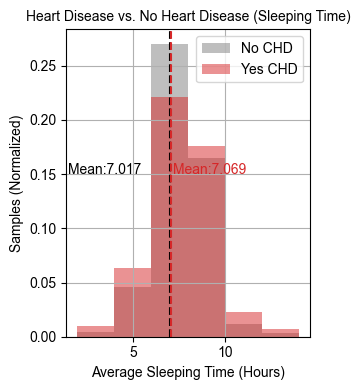

In [159]:
fig, ax = plt.subplots(1,1,figsize=(3.3,4)) 
ax.hist(no_michd_sleep, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(1.99,14,2))
ax.hist(yes_michd_sleep, density=True, color='tab:red', alpha=0.5, label='Yes CHD', bins = np.arange(1.99,14,2))
ax.axvline(np.mean(no_michd_sleep), color='black', ls='--')
ax.axvline(np.mean(yes_michd_sleep), color='tab:red', ls='--')
ax.text(np.mean(no_michd_sleep)-5.55, 0.15, 'Mean:' + str(round(np.mean(no_michd_sleep),3)))
ax.text(np.mean(yes_michd_sleep) + 0.10, 0.15, 'Mean:' + str(round(np.mean(yes_michd_sleep),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Average Sleeping Time (Hours)')
ax.set_ylabel('Samples (Normalized)')
ax.set_title('Heart Disease vs. No Heart Disease (Sleeping Time)', size=10)
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_sleep, yes_michd_sleep))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3E.svg")

In [90]:
height_scaler = MinMaxScaler()
height_scaler.fit(np.log(df.HTIN4.to_numpy().reshape(-1, 1)))
no_michd = df_target[df_target == 0].index
yes_michd = df_target[df_target == 1].index
no_michd_height = df_features.HTIN4.reindex(no_michd)
scaled = no_michd_height.to_numpy().reshape(-1, 1)
scaled = height_scaler.inverse_transform(scaled)
no_michd_height = pd.Series(scaled[:, 0])
no_michd_height = np.e ** no_michd_height
no_michd_height = no_michd_height * 2.54
yes_michd_height = df_features.HTIN4.reindex(yes_michd)
scaled = yes_michd_height.to_numpy().reshape(-1, 1)
scaled = height_scaler.inverse_transform(scaled)
yes_michd_height = pd.Series(scaled[:, 0])
yes_michd_height = np.e ** yes_michd_height
yes_michd_height = yes_michd_height * 2.54
yes_michd_height

0        180.34
1        167.64
2        160.02
3        187.96
4        170.18
          ...  
31218    160.02
31219    187.96
31220    134.62
31221    180.34
31222    182.88
Length: 31223, dtype: float64

MannwhitneyuResult(statistic=4630233158.5, pvalue=1.0013584953428159e-31)


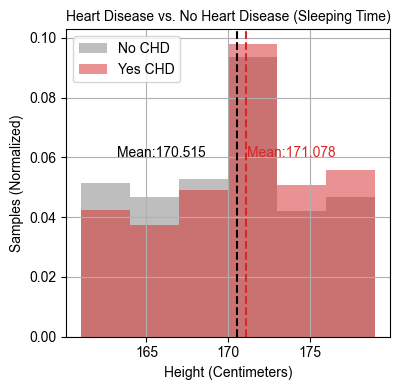

In [160]:
fig, ax = plt.subplots(1,1,figsize=(4.1,4)) 
ax.hist(no_michd_height, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(161,180, 3))
ax.hist(yes_michd_height, density=True, color='tab:red', alpha=0.5, label='Yes CHD', bins = np.arange(161,180, 3))
ax.axvline(np.mean(no_michd_height), color='black', ls='--')
ax.axvline(np.mean(yes_michd_height), color='tab:red', ls='--')
ax.text(np.mean(no_michd_height) - 7.3, 0.06, 'Mean:' + str(round(np.mean(no_michd_height),3)))
ax.text(np.mean(yes_michd_height) + 0.1, 0.06, 'Mean:' + str(round(np.mean(yes_michd_height),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Height (Centimeters)')
ax.set_ylabel('Samples (Normalized)')
ax.set_title('Heart Disease vs. No Heart Disease (Sleeping Time)', size=10)
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_height, yes_michd_height))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3F.svg")

0.22098441573724095 0.0


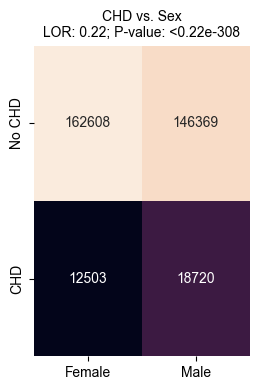

In [161]:
fig, ax = plt.subplots(1,1,figsize=(2.7,4))
cm_sex = sklearn.metrics.confusion_matrix(df_target, df_features._SEX)
# disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
# disp.plot()
odds_ratio, pvalue = scipy.stats.fisher_exact(cm_sex)
print(np.log10(odds_ratio), pvalue)
sns.heatmap(np.log(cm_sex), annot=cm_sex, fmt='.0f', ax=ax, cbar=False)
ax.set_xticklabels(['Female', 'Male'])
ax.set_yticklabels(['No CHD', 'CHD'])
ax.set_title("CHD vs. Sex\nLOR: 0.22; P-value: <0.22e-308", size = 10)
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_3G.svg")

In [175]:
complete_race_and_sex_summary = []
sex_labels = ['All', 'Male', 'Female']
for i in range(8):
    for j in range(3):
        for k in range(5):
            complete_race_and_sex_summary.append([df_race_and_sex_summary['category'][i*15], sex_labels[j], df_race_and_sex_summary['test MCC'][i*15 + j*5 + k], df_race_and_sex_summary['test ACC'][i*15 + j*5 + k], k + 1])
complete_race_and_sex_summary = pd.DataFrame(data = complete_race_and_sex_summary, columns = ['Race', 'Sex', 'MCC', 'ACC', 'Fold'])
complete_race_and_sex_summary

,Race,Sex,MCC,ACC,Fold
0,WHITE,All,0.304324,0.712131,1
1,WHITE,All,0.301978,0.714998,2
2,WHITE,All,0.308164,0.721729,3
3,WHITE,All,0.310361,0.723300,4
4,WHITE,All,0.312922,0.728996,5
...,...,...,...,...,...
115,ALL,Female,0.262889,0.714445,1
116,ALL,Female,0.261482,0.715179,2
117,ALL,Female,0.269717,0.729113,3
118,ALL,Female,0.268010,0.718406,4


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/2447827252.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


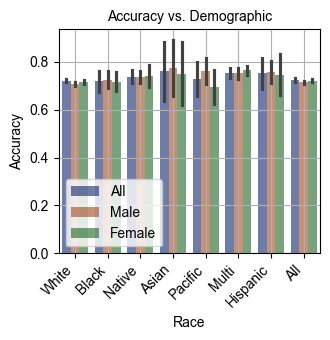

In [176]:
fig, ax = plt.subplots(1,1,figsize=(3.4,3.5))
sns.barplot(
    data=complete_race_and_sex_summary,
    x="Race", y="ACC", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("Accuracy")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("Accuracy vs. Demographic", size = 10)
ax.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_4A.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/176645818.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


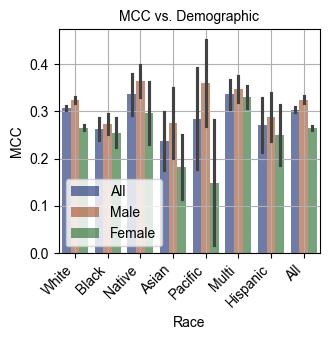

In [177]:
fig, ax = plt.subplots(1,1,figsize=(3.4,3.5))
sns.barplot(
    data=complete_race_and_sex_summary,
    x="Race", y="MCC", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("MCC")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("MCC vs. Demographic", size = 10)
ax.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_4B.svg")

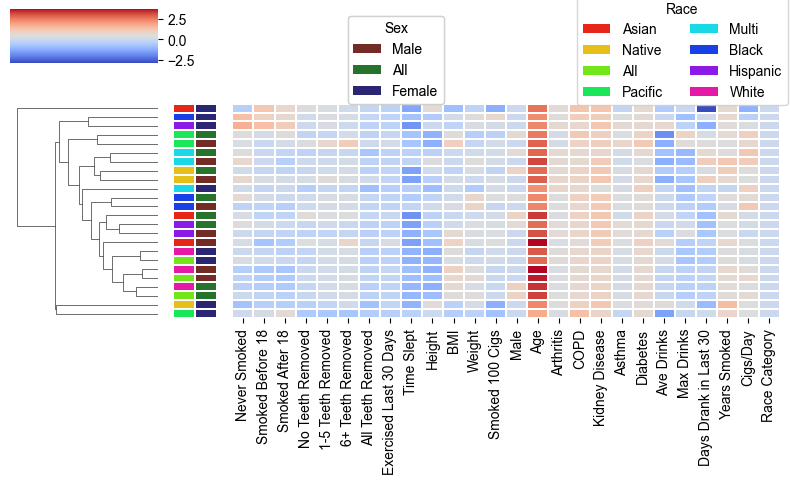

In [178]:
#fig, ax = plt.subplots(1,1,figsize=(8,8))

races = ['White', 'Black', 'Native', 'Asian', 'Pacific', 'Multi', 'Hispanic', 'All']
labels = []
for i in races:
    for j in range(3):
        labels.append(i)
lut = dict(zip(set(labels), sns.hls_palette(len(set(labels)), l=0.5, s=0.8)))
row_colors = pd.DataFrame(labels)[0].map(lut)
#Create additional row_colors here
sex_labels = ['All', 'Male', 'Female']
labels2 = sex_labels*8
lut2 = dict(zip(set(labels2), sns.hls_palette(len(set(labels2)), l=0.3, s=0.5)))
row_colors2 = pd.DataFrame(labels2)[0].map(lut2)
from matplotlib.patches import Patch
handles = [Patch(facecolor=lut[name]) for name in lut]
handles2 = [Patch(facecolor=lut2[name]) for name in lut2]
coef_summary_tp = coef_summary.transpose().fillna(0)
coef_summary_tp.columns = ['Never Smoked', 'Smoked Before 18', 'Smoked After 18', 'No Teeth Removed', '1-5 Teeth Removed', '6+ Teeth Removed', 'All Teeth Removed', 'Exercised Last 30 Days', 'Time Slept', 'Height', 'BMI', 'Weight', 'Smoked 100 Cigs', 'Male','Age', 'Arthritis', 'COPD', 'Kidney Disease', 'Asthma', 'Diabetes', 'Ave Drinks', 'Max Drinks', 'Days Drank in Last 30', 'Years Smoked', 'Cigs/Day', 'Race Category']
#coef_summary_tp = coef_summary_tp.transpose()
sns.clustermap(coef_summary_tp, yticklabels = False, col_cluster=False, linewidths=0.1, cmap='coolwarm', row_colors=[row_colors, row_colors2], figsize = (8,5))
#cm = sns.clustermap(coef_summary_tp, linewidths=0.1, cmap='coolwarm',col_cluster=False,figsize = (7,7))
#ax = cm.ax_heatmap
#ax.set_xticklabels(['Never Smoked', 'Smoked Before 18', 'Smoked After 18', 'No Teeth Removed', '1-5 Teeth Removed', '6+ Teeth Removed', 'All Teeth Removed', 'Exercised Last 30 Days', 'Time Slept', 'Height', 'BMI', 'Weight', 'Smoked 100 Cigs', 'Male','Age', 'Arthritis', 'COPD', 'Kidney Disease', 'Asthma', 'Diabetes', 'Ave Drinks', 'Max Drinks', 'Days Drank in Last 30', 'Years Smoked', 'Cigs/Day', 'Race Category'])
legend1 = plt.legend(handles, lut, title='Race', ncols = 2, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
legend2 = plt.legend(handles2, lut2,title = 'Sex', bbox_to_anchor=(0.57, 0.96), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_4C.svg")

In [179]:
vars_to_analyze = ['CHCCOPD3', 'CHCKDNY2']
lor_summary = []
for i, r in enumerate(races):
    for j, s in enumerate(sex_labels):
        to_append = [r, s]
        for k in vars_to_analyze:
            cm_temp = sklearn.metrics.confusion_matrix(df_targets_races_and_sex[i*3+j], df_features_races_and_sex[i*3+j][k])
            odds_ratio, pvalue = scipy.stats.fisher_exact(cm_temp)
            to_append.append(np.log10(odds_ratio))
            to_append.append(pvalue)
        lor_summary.append(to_append)
columns = ['Race', 'Sex', 'CHCCOPD3 LOR', 'CHCCOPD3 P-Value', 'CHCKDNY2 LOR', 'CHCKDNY2 P-Value']
lor_summary = pd.DataFrame(data = lor_summary, columns = columns)
lor_summary

,Race,Sex,CHCCOPD3 LOR,CHCCOPD3 P-Value,CHCKDNY2 LOR,CHCKDNY2 P-Value
0,White,All,0.607869,0.000000e+00,0.638271,0.000000e+00
1,White,Male,0.609818,0.000000e+00,0.649283,0.000000e+00
2,White,Female,0.655331,0.000000e+00,0.663931,0.000000e+00
3,Black,All,0.676113,3.182941e-122,0.739703,1.771912e-121
4,Black,Male,0.613336,1.427255e-38,0.781892,1.594866e-62
5,Black,Female,0.728169,1.493593e-88,0.706835,2.649199e-61
6,Native,All,0.734966,5.672839e-54,0.781369,2.212228e-35
7,Native,Male,0.699458,7.165726e-26,0.791270,4.162905e-19
8,Native,Female,0.825297,1.735947e-32,0.812699,5.607282e-19
9,Asian,All,0.881188,1.662640e-17,0.976952,1.582029e-30


/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/3108491815.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


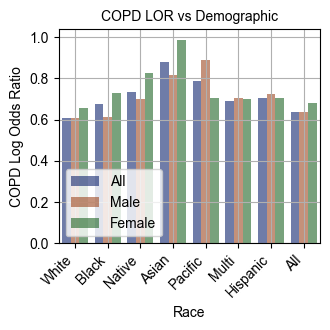

In [180]:
fig, ax = plt.subplots(1,1,figsize=(3.4,3.4))
sns.barplot(
    data=lor_summary,
    x="Race", y="CHCCOPD3 LOR", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("COPD Log Odds Ratio")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("COPD LOR vs Demographic", size = 10)
ax.grid()
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_4D.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/58913292.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


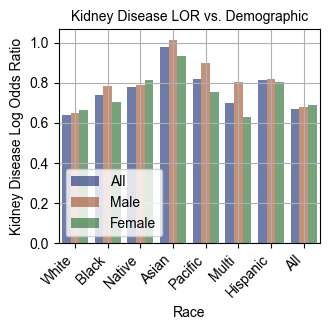

In [181]:
fig, ax = plt.subplots(1,1,figsize=(3.4,3.4))
sns.barplot(
    data=lor_summary,
    x="Race", y="CHCKDNY2 LOR", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("Kidney Disease Log Odds Ratio")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("Kidney Disease LOR vs. Demographic", size = 10)
ax.grid()
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_4E.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/2971899602.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


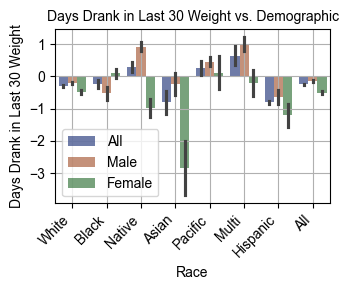

In [182]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))
sns.barplot(
    data=coef_summary_all_samples,
    x="Race", y="ALCDAY4", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("Days Drank in Last 30 Weight")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("Days Drank in Last 30 Weight vs. Demographic", size = 10)
ax.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5A.svg")

In [183]:
target_index = 9
alcday4_scaler = MinMaxScaler()
alcday4_scaler.fit(np.log(pd.Series(alc).replace({777: np.nan, 999:np.nan}).to_numpy() + 1).reshape(-1, 1))
no_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 0].index
yes_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 1].index
no_michd_feature = df_features_races_and_sex[target_index].ALCDAY4.reindex(no_michd)
scaled = no_michd_feature.to_numpy().reshape(-1, 1)
scaled = alcday4_scaler.inverse_transform(scaled)
no_michd_feature = pd.Series(scaled[:, 0])
no_michd_feature = np.e ** no_michd_feature
no_michd_feature = no_michd_feature - 1
yes_michd_feature = df_features_races_and_sex[target_index].ALCDAY4.reindex(yes_michd)
scaled = yes_michd_feature.to_numpy().reshape(-1, 1)
scaled = alcday4_scaler.inverse_transform(scaled)
yes_michd_feature = pd.Series(scaled[:, 0])
yes_michd_feature = np.e ** yes_michd_feature
yes_michd_feature = yes_michd_feature - 1

MannwhitneyuResult(statistic=1729526.5, pvalue=7.98522693552776e-07)


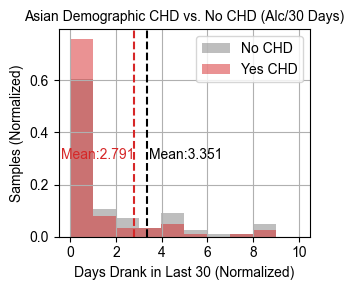

In [184]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3))
ax.hist(no_michd_feature, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(-0.01, 10, 1))
ax.hist(yes_michd_feature, density=True, color='tab:red', alpha=0.5, label='Yes CHD', bins = np.arange(-0.01, 10, 1))
ax.axvline(np.mean(no_michd_feature), color='black', ls='--')
ax.axvline(np.mean(yes_michd_feature), color='tab:red', ls='--')
ax.text(np.mean(no_michd_feature)+0.1, 0.3, 'Mean:' + str(round(np.mean(no_michd_feature),3)))
ax.text(np.mean(yes_michd_feature)-3.2, 0.3, 'Mean:' + str(round(np.mean(yes_michd_feature),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Days Drank in Last 30 (Normalized)')
ax.set_ylabel('Samples (Normalized)')
ax.set_title('Asian Demographic CHD vs. No CHD (Alc/30 Days)', size=10)
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_feature, yes_michd_feature))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5B.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/3180229743.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


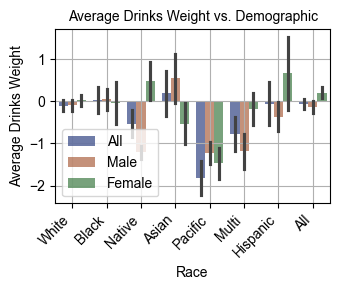

In [185]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))
sns.barplot(
    data=coef_summary_all_samples,
    x="Race", y="AVEDRNK3", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("Average Drinks Weight")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("Average Drinks Weight vs. Demographic", size = 10)
ax.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5C.svg")

In [186]:
avedrnk3_scaler = MinMaxScaler()
avedrnk3_scaler.fit(np.log(df.AVEDRNK3.replace({np.nan: 0, 88: 0, 77: np.nan, 99: np.nan}).to_numpy() + 1).reshape(-1, 1))
target_index = 12
no_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 0].index
yes_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 1].index
no_michd_feature = df_features_races_and_sex[target_index].AVEDRNK3.reindex(no_michd)
scaled = no_michd_feature.to_numpy().reshape(-1, 1)
scaled = avedrnk3_scaler.inverse_transform(scaled)
no_michd_feature = pd.Series(scaled[:, 0])
no_michd_feature = np.e ** no_michd_feature
no_michd_feature = no_michd_feature - 1
yes_michd_feature = df_features_races_and_sex[target_index].AVEDRNK3.reindex(yes_michd)
scaled = yes_michd_feature.to_numpy().reshape(-1, 1)
scaled = avedrnk3_scaler.inverse_transform(scaled)
yes_michd_feature = pd.Series(scaled[:, 0])
yes_michd_feature = np.e ** yes_michd_feature
yes_michd_feature = yes_michd_feature - 1

MannwhitneyuResult(statistic=167368.0, pvalue=0.0036200606988519074)


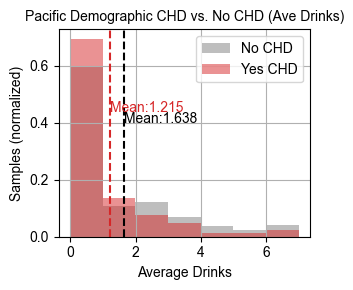

In [187]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3)) 
ax.hist(no_michd_feature, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(-0.01, 7.98, 1))
ax.hist(yes_michd_feature, density=True, color='tab:red', alpha=0.5, label='Yes CHD', bins = np.arange(-0.01, 7.98, 1))
ax.axvline(np.mean(no_michd_feature), color='black', ls='--')
ax.axvline(np.mean(yes_michd_feature), color='tab:red', ls='--')
ax.text(np.mean(no_michd_feature), 0.4, 'Mean:' + str(round(np.mean(no_michd_feature),3)))
ax.text(np.mean(yes_michd_feature), 0.44, 'Mean:' + str(round(np.mean(yes_michd_feature),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Average Drinks')
ax.set_ylabel('Samples (normalized)')
ax.set_title('Pacific Demographic CHD vs. No CHD (Ave Drinks)', size=10)
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_feature, yes_michd_feature))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5D.svg")

/var/folders/p1/5f3fsngn61x42xyf_x6d8p600000gn/T/ipykernel_13863/1798814012.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)


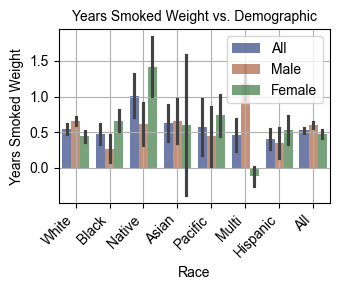

In [188]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3))
sns.barplot(
    data=coef_summary_all_samples,
    x="Race", y="_YRSSMOK", hue="Sex",
    errorbar="sd", palette="dark", alpha=.6, ax = ax
)
ax.set_ylabel("Years Smoked Weight")
ax.set_xticklabels(['White', "Black", "Native", "Asian", "Pacific", "Multi", "Hispanic", "All"], ha = "right", rotation = 45)
ax.set_title("Years Smoked Weight vs. Demographic", size = 10)
ax.grid()
plt.legend()
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5E.svg")

In [189]:
target_index = 6
yrssmok_scaler = MinMaxScaler()
yrssmok_scaler.fit(np.log(df._YRSSMOK.replace({np.nan: 0}).to_numpy() + 1).reshape(-1, 1))
no_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 0].index
yes_michd = df_targets_races_and_sex[target_index][df_targets_races_and_sex[target_index] == 1].index
no_michd_feature = df_features_races_and_sex[target_index]._YRSSMOK.reindex(no_michd)
scaled = no_michd_feature.to_numpy().reshape(-1, 1)
scaled = yrssmok_scaler.inverse_transform(scaled)
no_michd_feature = pd.Series(scaled[:, 0])
no_michd_feature = np.e ** no_michd_feature
no_michd_feature = no_michd_feature - 1
yes_michd_feature = df_features_races_and_sex[target_index]._YRSSMOK.reindex(yes_michd)
scaled = yes_michd_feature.to_numpy().reshape(-1, 1)
scaled = yrssmok_scaler.inverse_transform(scaled)
yes_michd_feature = pd.Series(scaled[:, 0])
yes_michd_feature = np.e ** yes_michd_feature
yes_michd_feature = yes_michd_feature - 1

MannwhitneyuResult(statistic=984470.5, pvalue=6.347157713924067e-36)


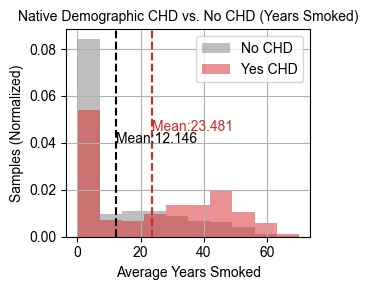

In [190]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3)) 
ax.hist(no_michd_feature, density=True, color='tab:gray', alpha=0.5, label='No CHD', bins = np.arange(0, 71, 7))
ax.hist(yes_michd_feature, density=True, color='tab:red', alpha=0.5, label='Yes CHD',bins = np.arange(0, 71, 7))
ax.axvline(np.mean(no_michd_feature), color='black', ls='--')
ax.axvline(np.mean(yes_michd_feature), color='tab:red', ls='--')
ax.text(np.mean(no_michd_feature), 0.04, 'Mean:' + str(round(np.mean(no_michd_feature),3)))
ax.text(np.mean(yes_michd_feature), 0.045, 'Mean:' + str(round(np.mean(yes_michd_feature),3)), color='tab:red')
ax.legend() # adds legend, based on the "label" field
ax.set_xlabel('Average Years Smoked')
ax.set_ylabel('Samples (Normalized)')
ax.set_title('Native Demographic CHD vs. No CHD (Years Smoked)', size=10)
ax.grid()
print(scipy.stats.mannwhitneyu(no_michd_feature, yes_michd_feature))
plt.tight_layout()
plt.savefig("Desktop/BRFSS/Fig_5F.svg")